
# Risk Prediction - Ouray County Parcel Risk
**Author:** Bryce A Young  
**Created:** 2025-01-17 | 
**Modified:** 2025-02-21 

#### Overview
This notebook trains and tests various supervized machine learning models to predict home risk scores. For each model, we explore and tune the parameters to minimize loss, and we analyze the suitability of each model.

## Step 0: Setup Environment
---

In [150]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Folder with other geometries
geoms = os.path.join(data, 'county_geoms')
# Folder with feature set
feat_path = os.path.join(data, '_out')
# Folder with risk scores
scores = os.path.join(data, 'wrwc_rwra')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Step 1: Examine Risk Score Data
---

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Set option to show all columns when displaying dataframes and geodataframes
pd.set_option('display.max_columns', None)

wrwc_df = pd.read_csv(os.path.join(scores, 'WRWC_RWRA.csv'))
wrwc_gdf = gpd.read_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'))

In [4]:
wrwc_gdf.head()

,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,geometry
0,2013.0,21932 2225 RD,297931200016,A,0,0,NaN,0,NaN,75,50,0,0,30,0,NaN,10,165,Moderate,POINT Z (-107.94621 38.9729 0)
1,2013.0,21944 2225 RD,297931200018,A,0,0,NaN,0,NaN,75,50,0,60,30,50,NaN,10,275,Very High,POINT Z (-107.947 38.9732 0)
2,2013.0,21939 2225 RD,297931200061,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,POINT Z (-107.94698 38.97218 0)
3,2013.0,21961 2225 RD,297931200060,A,0,0,NaN,75,NaN,50,75,0,60,30,50,NaN,10,350,Extreme,POINT Z (-107.9474 38.97219 0)
4,2013.0,21973 2225 RD,297931200021,A,0,0,NaN,75,NaN,50,75,0,60,30,50,NaN,10,350,Extreme,POINT Z (-107.948 38.9723 0)


In [6]:
wrwc_df.head()

,OBJECTID,Join_Count,ID,Fire_Prote,county,Year,Address_Po,Ingress_Eg,Driveway_W,Driveway_C,Driveway_L,Distance_t,Slope_or_G,Background,Defesnible,Roof,Siding,Distance_1,Combustibl,Proximity_,Type_of_St,Score,Risk_Ratin,address,town,latitude,longitude,x,y,ParcelNum
0,1,0,DC001,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Greater than 150',,Heavy,Between 30' - 150',Class A,Non-Combustible,Less than 10' from structure,NaN,,,1 Moderate,Moderate,21932 2225 RD,CEDAREDGE,38.9729,-107.946,-107.946,38.9729,NaN
1,2,1,DC002,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Greater than 150',,Heavy,Between 30' - 150',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,2 High,High,21944 2225 RD,CEDAREDGE,38.9732,-107.947,-107.947,38.9732,2.979312e+11
2,3,1,DC003,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Between 20' -24',,,Less than 50',,Moderate,Less than 10',Class A,"Wood, Vinyl",Between 10' - 30' from structure,Combustible Deck/Fence attached to Structure,,,4 Extreme,Extreme,21939 2225 RD,CEDAREDGE,38.9713,-107.947,-107.947,38.9713,2.979312e+11
3,4,1,DC004,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Less than 50',,Moderate,Between 10' - 30',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,3 Very High,Very High,21961 2225 RD,CEDAREDGE,38.9721,-107.947,-107.947,38.9721,2.979312e+11
4,5,1,DC005,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Less than 50',,Moderate,Between 10' - 30',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,3 Very High,Very High,21973 2225 RD,CEDAREDGE,38.9723,-107.948,-107.948,38.9723,2.979312e+11


In [31]:
print(wrwc_df['ID'].nunique())
print(len(wrwc_df))

4591
6596


In [5]:
feat = pd.read_csv(os.path.join(feat_path, 'feat_nonan.csv'))
feat.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL)
0,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,403726200085,R002417,35.8913,False,1999.0,0 - N/A,1 - RANCH,0.0,2006.0,3 - GOOD,0.0,2005.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,0.0,577.5,0.776148,9 - PRO PANEL,3 - SHED MED,Residence,0.0
1,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,403915300016,R004080,40.1202,False,2009.0,0 - N/A,1 - RANCH,0.0,1725.0,2 - VERY GOOD,0.0,2010.0,90.0,5 - STUCCO (F),4 - CONC/TILE,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,560.0,0.0,0.776148,3 - DISTRESSED METAL,6 - GABEL MED,Residence,0.0
2,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,403736200037,R002506,39.7779,False,1996.0,0 - N/A,7 - MTN CABIN,0.0,692.6,3 - GOOD,0.0,2005.0,100.0,2 - WOOD,5 - CONCRETE,0 - N/A,2 - WOOD,1 - DRYWALL,7000006 - Outlying6,0.0,0.0,0.000000,5 - ASPH SHNGL,3 - SHED MED,Residence,0.0
3,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,403925218002,R004877,16.5952,True,2004.0,0 - N/A,5 - MODULAR,0.0,894.0,3 - GOOD,0.0,2010.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,179.0,0.0,0.776148,9 - PRO PANEL,6 - GABEL MED,Residence,0.0
4,Ouray County,3,20.213243,0.056646,0.058065,0.112239,0.181261,2,404129300015,R004133,398.9760,False,1958.0,1 - NONE,1 - RANCH,0.0,1262.0,3 - GOOD,0.0,1995.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,3 - PANELING,7000002 - Outlying2,0.0,0.0,0.000000,9 - PRO PANEL,6 - GABEL MED,Residence,0.0


In [ ]:
# How many assessments in Ouray?
wrwc_df_ouray = wrwc_df[wrwc_df['county'] == 'Ouray']
len(wrwc_df_ouray)

1081

In [29]:
wrwc_df_ouray.head(2)

,OBJECTID,Join_Count,ID,Fire_Prote,county,Year,Address_Po,Ingress_Eg,Driveway_W,Driveway_C,Driveway_L,Distance_t,Slope_or_G,Background,Defesnible,Roof,Siding,Distance_1,Combustibl,Proximity_,Type_of_St,Score,Risk_Ratin,address,town,latitude,longitude,x,y,ParcelNum
4122,4123,1,LH1000,LogHill,Ouray,2017,"Posted, NOT Reflective",Two or More Roads In/Out,Greater than 24',,,Greater than 150',Less than 20%,Light,Between 30' - 150',Class A,Non-Combustible,"None, Greater than 30' from structure",Non-Combustible Deck/Fence attached to Structure,,,0 Low,Low,416 COUNTY ROAD 22A,Log Hill Mesa Fire Protection District,38.289468,-107.823723,-107.823723,38.289468,403935100181
4123,4124,1,LH1001,LogHill,Ouray,2017,Not Visible from the Road,Two or More Roads In/Out,Greater than 24',,,Greater than 150',Less than 20%,Light,Greater than 150',Class A,Non-Combustible,Less than 10' from structure,Non-Combustible Deck/Fence attached to Structure,,,0 Low,Low,3100 COUNTY ROAD 22,Log Hill Mesa Fire Protection District,38.297780,-107.824325,-107.824325,38.297780,403926423002


In [9]:
wrwc_df_ouray['ParcelNum'].nunique()

1002

In [21]:
feat['PARCELNB'].nunique()

2479

In [23]:
len(feat)

4002

In [10]:
wrwc_df_ouray['ParcelNum'].isna().sum()

np.int64(2)

In [17]:
# What are the data types of parcel numbers across the three datasets

print(f'wrwc df dtype: {wrwc_df_ouray['ParcelNum'].dtype}')
print(f'wrwc GDF dtype: {wrwc_gdf['ParcelNum'].dtype}')
print(f'feat dtype: {feat['PARCELNB'].dtype}')

wrwc df dtype: float64
wrwc GDF dtype: object
feat dtype: object


So first thing we need to do is convert 'ParcelNum' to string in the wrwc csv.

In [19]:
wrwc_df_ouray = wrwc_df_ouray.dropna(subset=['ParcelNum'])
wrwc_df_ouray['ParcelNum'] = wrwc_df_ouray['ParcelNum'].astype(int).astype(str)
wrwc_df_ouray['ParcelNum'].isin(feat['PARCELNB']).sum()

np.int64(935)

In [20]:
feat['PARCELNB'].isin(wrwc_df_ouray['ParcelNum']).sum()

np.int64(1362)

In [25]:
wrwc_df = wrwc_df.dropna(subset=['ParcelNum'])
wrwc_df['ParcelNum'] = wrwc_df['ParcelNum'].astype(int).astype(str)
feat['PARCELNB'].isin(wrwc_df['ParcelNum']).sum()

np.int64(1514)

In [26]:
feat['PARCELNB'].isin(wrwc_gdf['ParcelNum']).sum()

np.int64(1511)

In [28]:
print(f'total row matches: {wrwc_df['ParcelNum'].isin(feat['PARCELNB']).sum()}')
print(f'unique parcelnum matches: {wrwc_df.loc[wrwc_df['ParcelNum'].isin(feat['PARCELNB']), 'ParcelNum'].nunique()}')

total row matches: 1027
unique parcelnum matches: 933


So of the 4000 building centroids that I have features for, there are 1514 rows with 'PARCELNB' values that are also in the WRWC csv.

The wrwc df and the feat df both contain duplicate values for parcel numbers. So this results in a many-to-many relationship between the data. If I join the csvs, then I am losing confidence that the risk score is assigned to the correct building from my centroids dataset. 

So I will try to see if I can relate the centroids to the geometries in the gdf.

<Axes: >

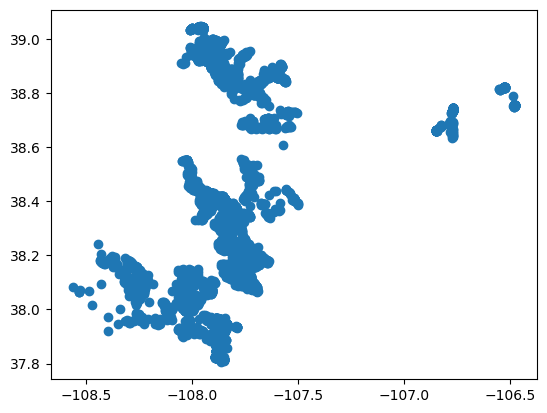

In [34]:
wrwc_gdf.to_crs(26913)
wrwc_gdf.plot()

<Axes: >

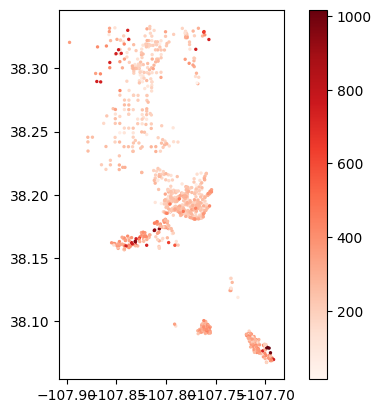

In [ ]:
# Plot risk scores of assessments that are in my feature set
wrwc_gdf_ouray = wrwc_gdf[wrwc_gdf['ParcelNum'].isin(feat['PARCELNB'])]
wrwc_gdf_ouray.plot(column='Score_Final', legend=True, cmap='Reds', markersize=2)

In [37]:
wrwc_gdf_ouray.head()

,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,geometry
976,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225,High,POINT Z (-107.79564 38.18671 0)
977,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135,Low,POINT Z (-107.79564 38.18671 0)
978,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,POINT Z (-107.79564 38.18671 0)
979,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415,Extreme,POINT Z (-107.79564 38.18671 0)
4082,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,NaN,0,0.0,25,50,0,0,0,20,NaN,0,100,Low,POINT Z (-107.82372 38.28947 0)


In [38]:
len(wrwc_gdf_ouray)

1017

In [39]:
wrwc_gdf_ouray['ParcelNum'].nunique()

930

In [40]:
wrwc_gdf_ouray['address'].nunique()

586

In [50]:
wrwc_gdf_ouray['geometry'].nunique()

1004

## Step 2: Join Parcel Features and Risk Assessments
---

Okay, let's start over with a clean slate and new variables.

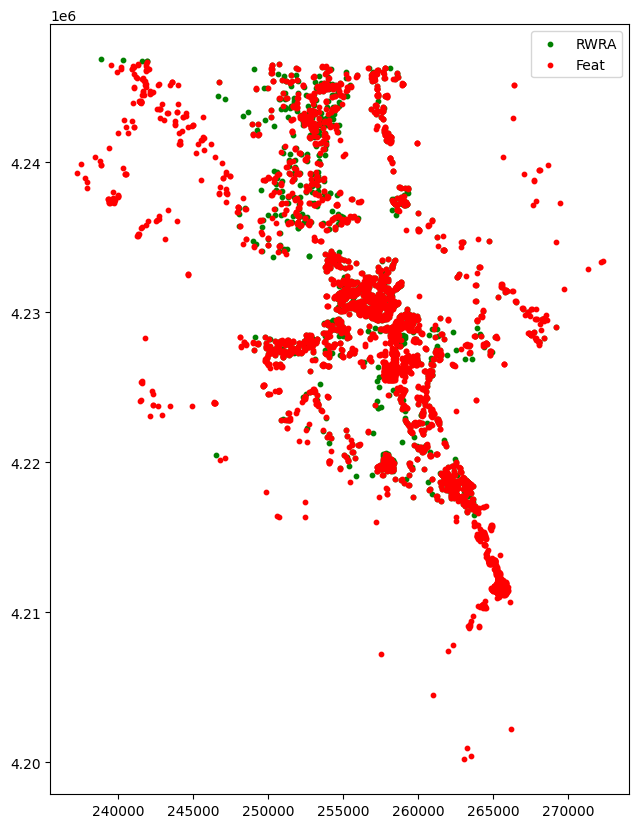

In [4]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Folder with feature set
feat_path = os.path.join(data, '_out')
# Folder with risk scores
scores = os.path.join(data, 'wrwc_rwra')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

# Import objects
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_columns', None)
rwra = gpd.read_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'), layer='wrwc_ouray')
rwra = rwra.to_crs(26913)
feat = gpd.read_file(os.path.join(feat_path, 'centr_full_nonan_WKID26913.gpkg'))

# Plot to preview data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

# Plot rwra points in green
rwra.plot(ax=ax, color='green', markersize=10, label='RWRA')

# Plot feat points in red
feat.plot(ax=ax, color='red', markersize=10, label='Feat')

# Optional: add a legend and a title
plt.legend()
plt.show()

Since we projected `rwra` to EPSG:26913, we'll save it to file so we don't forget about it later.

In [35]:
rwra.to_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'), layer='wrwc_ouray', driver='GPKG')

In [5]:
print(len(rwra))
print(len(feat))

1684
4002


In [20]:
rwra['ParcelNum'].isna().sum()

np.int64(509)

Okay, this is an issue. There are 509 objects without ParcelNum values. I will have to bring in the parcels shapefile and fill in values where the point lands in the parcel.

In [22]:
parcels = gpd.read_file(os.path.join(geoms, 'parcels_WKID26913.gpkg'))

In [24]:
parcels.columns

Index(['ACCOUNT', 'PARCELNB', 'LAND_STATU', 'EditStatus', 'EDIT_STATU',
       'MS_Number', 'MS_Name', 'ACRES_calc', 'ACCT_URL', 'Note', 'NAMEADDRID',
       'NAMETYPE', 'NAME', 'ADDRESS1', 'ADDRESS2', 'CITY', 'STATE', 'ZIPCODE',
       'ACCTTYPE', 'STREETNO', 'EXTENT', 'DIRECTION', 'STREETNAME',
       'DESIGNATIO', 'DIRECTIONS', 'SUFFIX', 'UNITNUMBER', 'LOCCITY',
       'ZIPCODE1', 'SUBNAME', 'CONDONAME', 'SALEP', 'SALEDT', 'ACRES',
       'geometry'],
      dtype='object')

In [27]:
# Separate points without a ParcelNum
rwra_nan = rwra[rwra['ParcelNum'].isna()].copy()
# Reset index for clean joining
rwra_nan_reset = rwra_nan.reset_index()

# Spatial join (points within parcels)
joined = gpd.sjoin(
    rwra_nan_reset,
    parcels[['PARCELNB', 'geometry']],
    how='left',
    predicate='within'
)

# Drop duplicates to keep only one parcel per point
joined_unique = joined.drop_duplicates(subset='index', keep='first')

# Assign the PARCELNB back to original rwra_nan
rwra_nan['ParcelNum'] = joined_unique.set_index('index')['PARCELNB']

# Update original rwra
rwra.loc[rwra_nan.index, 'ParcelNum'] = rwra_nan['ParcelNum']


In [29]:
rwra['ParcelNum'].isna().sum()

np.int64(0)

Here is the solution to matching features and risk assessments. Unforntunately this is difficult with the csv files alone. Fortunately, we have points for the assessments. Looking at them in ArcGIS Pro, we can see that they land approximately ontop of the building centroid. So we're going to write a function and a short script that does the following:

1. If only one point exists per parcel in each dataset:
    - Simply match rows by parcel number.
2. If multiple points exist per parcel in either or both datasets:
    - Match rows where the parcel number is the same AND the points from each dataset are spatially closest to each other. (i.e., pick pairs based on minimum distance between points).

In [30]:
import geopandas as gpd
import pandas as pd

def match_structures(rwra, feat):
    matches = []

    # Go through each unique parcel number from rwra
    for parcel in rwra['ParcelNum'].unique():
        rwra_subset = rwra[rwra['ParcelNum'] == parcel]
        feat_subset = feat[feat['PARCELNB'] == parcel]

        if len(rwra_subset) == 0 or len(feat_subset) == 0:
            # Skip parcels without points in either dataset
            continue

        elif len(rwra_subset) == 1 and len(feat_subset) == 1:
            # Direct one-to-one match
            match = {
                'rwra_index': rwra_subset.index[0],
                'feat_index': feat_subset.index[0],
                'parcel_num': parcel
            }
            matches.append(match)

        else:
            # Multiple points: match each rwra point to nearest feat point
            rwra_subset = rwra_subset.copy()
            feat_subset = feat_subset.copy()

            # For each rwra point, find closest feat point
            for rwra_idx, rwra_row in rwra_subset.iterrows():
                feat_subset['distance'] = feat_subset.geometry.distance(rwra_row.geometry)
                closest_feat_idx = feat_subset['distance'].idxmin()

                match = {
                    'rwra_index': rwra_idx,
                    'feat_index': closest_feat_idx,
                    'parcel_num': parcel
                }
                matches.append(match)

                # Drop matched feat point to avoid duplicates
                feat_subset = feat_subset.drop(index=closest_feat_idx)

                if feat_subset.empty:
                    break  # No feat points left to match

    # Convert matches into DataFrame
    matches_df = pd.DataFrame(matches)

    # Merge matched attributes from rwra and feat
    merged_df = matches_df \
        .merge(rwra.drop(columns='geometry'), left_on='rwra_index', right_index=True, suffixes=('', '_rwra')) \
        .merge(feat, left_on='feat_index', right_index=True, suffixes=('_rwra', '_feat'))

    # Turn merged DataFrame back into a GeoDataFrame using feat's geometry
    matched_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs=feat.crs)

    return matched_gdf


In [31]:
gdf = match_structures(rwra, feat)
print(len(gdf))
gdf.head()

1400


,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL),geometry
0,0,2836,430506210001,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225,High,Ouray County,1,31.525324,0.028983,0.080487,0.112609,0.179108,1,430506210001,R003918,49.6527,True,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255148.616 4230223.23)
1,1,1110,430506210001,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135,Low,Ouray County,1,31.525324,0.051442,0.096132,0.093393,0.155315,1,430506210001,R003918,49.6527,False,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255108.006 4230179.848)
2,2,3672,430506210001,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,Ouray County,1,66.164004,0.035089,0.059277,0.031211,0.026098,0,430506210001,R003918,49.6527,True,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255042.316 4230227.366)
3,3,3843,430506210001,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415,Extreme,Ouray County,1,78.033957,0.054498,0.065344,0.076959,0.213781,0,430506210001,R003918,49.6527,False,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255079.817 4230091.78)
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,NaN,0,0.0,25,50,0,0,0,20,NaN,0,100,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.000000,0,403935100181,R000531,32.7283,False,2012.0,0 - N/A,1 - RANCH,0.0,4034.9,3 - GOOD,0.0,2015.0,100.0,26 - CONCRETE SIDING,1 - WDJST PLYW,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,572.0,215.0,0.776148,5 - ASPH SHNGL,6 - GABEL MED,Residence,0.0,POINT (252995.437 4241729.295)


Okay, so there are 1400 matching parcels for which I have both risk assessment data and remotely sensed parcel features. Let's plot the matched points with lines connecting them in order to see how this match took place.

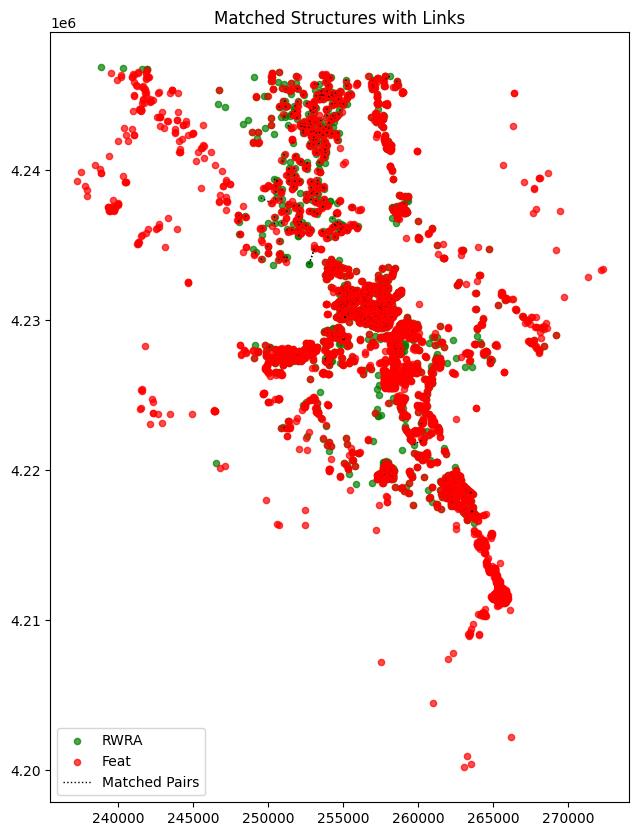

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def plot_matched_links(matched_gdf, rwra, feat):
    line_geoms = []

    for _, row in matched_gdf.iterrows():
        rwra_geom = rwra.loc[row['rwra_index'], 'geometry']
        feat_geom = feat.loc[row['feat_index'], 'geometry']

        # Ensure both are points
        if rwra_geom.geom_type == 'Point' and feat_geom.geom_type == 'Point':
            # Extract coordinates explicitly
            line = LineString([(rwra_geom.x, rwra_geom.y), (feat_geom.x, feat_geom.y)])
            line_geoms.append(line)
        else:
            print(f"Non-point geometry at rwra_index: {row['rwra_index']} or feat_index: {row['feat_index']}")

    lines_gdf = gpd.GeoDataFrame(geometry=line_geoms, crs=rwra.crs)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    rwra.plot(ax=ax, color='green', markersize=20, label='RWRA', alpha=0.7)
    feat.plot(ax=ax, color='red', markersize=20, label='Feat', alpha=0.7)
    lines_gdf.plot(ax=ax, color='black', linestyle=':', linewidth=1, label='Matched Pairs')

    plt.legend()
    plt.title('Matched Structures with Links')
    plt.show()

    return lines_gdf

# Run the updated version:
lines_gdf = plot_matched_links(gdf, rwra, feat)



In [33]:
lines_gdf.to_file(os.path.join(scratch, 'matches.gpkg'), driver='GPKG', index=False)

In [34]:
gdf.to_file(os.path.join(out, 'feat_risk_final.gpkg'), driver='GPKG', index=False)

In [18]:
gdf.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out',
       'Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)'

In [36]:
# Save as csv for lighter analysis
df = gdf.drop(columns=['geometry', 'ParcelNum', 'rwra_index', 'feat_index', 'parcel_num', 'PARCELNB', 
                       'address', 'Model', 'County', 'ACCOUNT', 'Area Acres\n(Area_ACRES)'])
df.to_csv(os.path.join(out, 'final_df.csv'), index=False)

Okay, because this is a whrilwind of a day here is the synopsis of what I did:

Outputs: final_df.csv (located in output folder)
lines connecting matched points: matches.gpkg, located in scratch folder
feat_risk_final.gpkg - located in output folder (contains features and risk assessment data)

Look at the code block below. You can see that there are three different types of models that were used to create final risk scores in all of these assessments. I am going to have to figure out a way to normalize these or relate them somehow, so I'm not dealing with so much incongruency and inconsistency.

## Step 3: Refactoring Scores from Different RWRA Scoring Models
---

In [37]:
rwra['Model'].nunique()

3

Below we see the distribution of the different models that were used to create the risk score in the RWRA data. We can safely remove the 4 Model A observations. Removing any of the others, however, would serverely limit our dataset. Therefore, we're going to have to explore these data more thoroughly in order to understand the relationship between model B and C scores. Not just the final risk score, but also the score that each feature receives. Features are weighted differently between models, so this introduces some significant complexity to the analysis. 

In [51]:
models = ['A', 'B', 'C']
for m in models:
    print(f'Model {m}: {len(gdf[gdf['Model'] == m])}')

Model A: 4
Model B: 589
Model C: 807


Features of Model B:
- Address visible (3 class)
- Ingress/Egress (2 class)
- Driveway clearance (3 class)
- Distance to dangerous topography (3 class)
- Slope (3 class)
- Background fuels (3 class)
- Defensible space (4 class)
- Roofing material (2 class)
- Building exterior (3 class)
- Other combustibles (3 class)
- Decks & Fencing (3 class)

Features of Model C:
- Address visible (3 class)
- Ingress/Egress (3 class)
- Driveway clearance (4 class)
- Driveway length (4 class)
- Distance to dangerous topography (4 class)
- Slope (4 class)
- Background fuels (4 class)
- Defensible space (5 class)
- Roofing material (3 class)
- Building exterior (4 class)
- Other combustibles (4 class)
- Decks & Fencing (4 class)
- What is the closest distance to a neighboring homes? (4 class)

The primary difference between Model B and Model C is that Model C has the addition of an 'Unknown - not observed' class per feature. This feature class receives the highest weight by 1 point higher than the highest observed feature class. 

2 additional features absent from Model B but present in Model C include Driveway length and What is the closest distance to a neighboring home?

Scoring criteria that differ include: 
- Distance to dangerous topography (Model B: 0, 30, 75; Model C: 0, 25, 50, 51), 
- Slope (Model B: 0, 20, 40; Model C: 0, 10, 20, 21), 
- Background fuels (Model B: 25, 50, 75; Model C: 10, 20, 40, 41), 
- Roofing material (Model B: 0, 200; Model C: 0, 300, 301), 
- Building exterior (Model B: 0, 20, 60; Model C: 0, 35, 70, 71), 
- Other combustibles (Model B: 0, 10, 30; Model C: 0, 40, 80, 81), and 
- Decks & fencing (Model B: 0, 20, 50; Model C: 0, 0, 100, 101).
Therefore, the only features that have the same values in both models are Address visible, Ingress/Egress, Driveway clearance, and defensible space. 

The max score that can be achieved in Model B is 665. The max score in Model C is 1000. Therefore, the features that receive the same scores in both models have less weight in Model C, which includes defensible space. Distance to dangerous topography has significantly less weight in Model C, as do slope and background fuels. Roofing material, building exterior, other combustibles, and decks and fencing have at least equal weight or greater in Model C.

In order to give these models the same scores, I will have to determine the weight that each feature receives per class, and adjust them accordingly. Two things that will be easy to determine are structure distance (since I have already calculated this with GIS) and NaN values in Model B, since NaN values can be given the "Unknown - not observed" score. But I will have to basically turn Model B scores into Model C scores. Since there is one extra feature in Model C (driveway length) that I can't easily capture, I could consider dropping the feature entirely and re-computing the maximum value. Since it is lightly weighted, this would bring the max score in Model C from 1000 to 989. 

Below, I will create a dataframe with all the features and weights of each model. I will use these rules to **refactor** Model B to Model C.

I am using Model C because it is the model that was published in peer review (Meldrum et al. 2022).

First, let's make a scatterplot to show the correlation of 'Score_Final' between models.

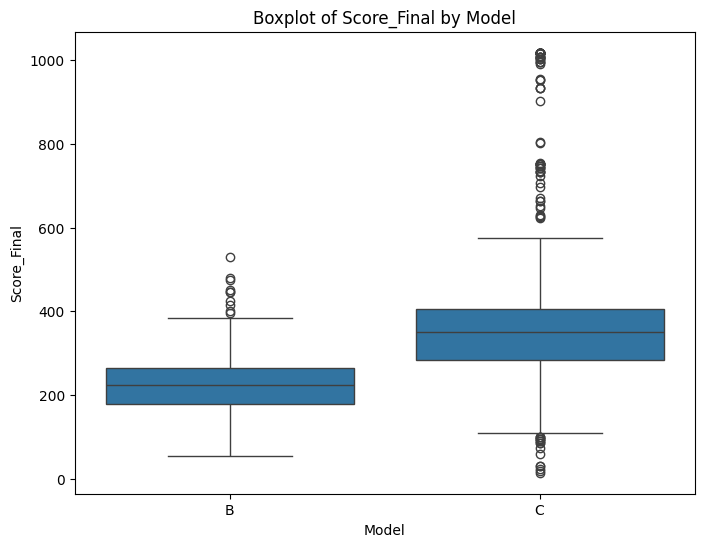

In [54]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=gdf[gdf['Model'] != 'A'], x='Model', y='Score_Final')
plt.title('Boxplot of Score_Final by Model')
plt.show()

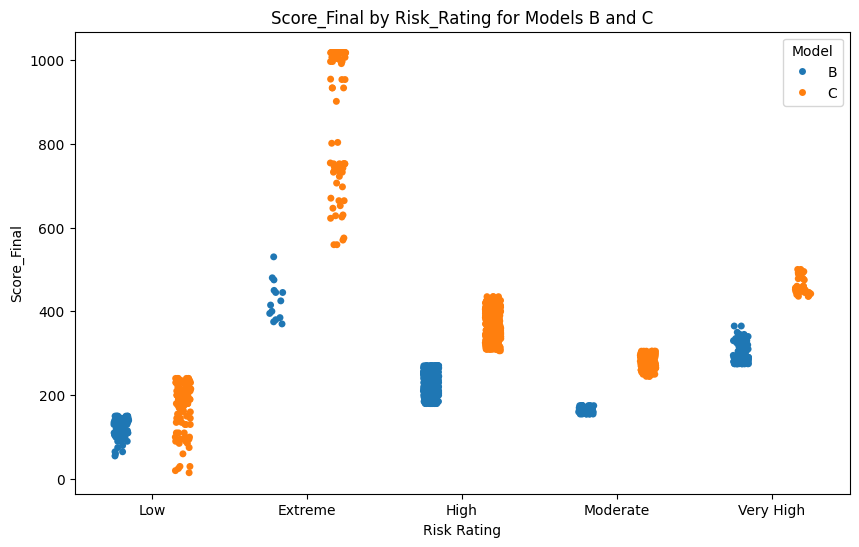

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only include Models B and C
filtered_gdf = gdf[gdf['Model'].isin(['B', 'C'])]

plt.figure(figsize=(10,6))
sns.stripplot(data=filtered_gdf, x='Risk_Rating', y='Score_Final', hue='Model', jitter=True, dodge=True)
plt.xlabel('Risk Rating')
plt.ylabel('Score_Final')
plt.title('Score_Final by Risk_Rating for Models B and C')
plt.legend(title='Model')
plt.show()

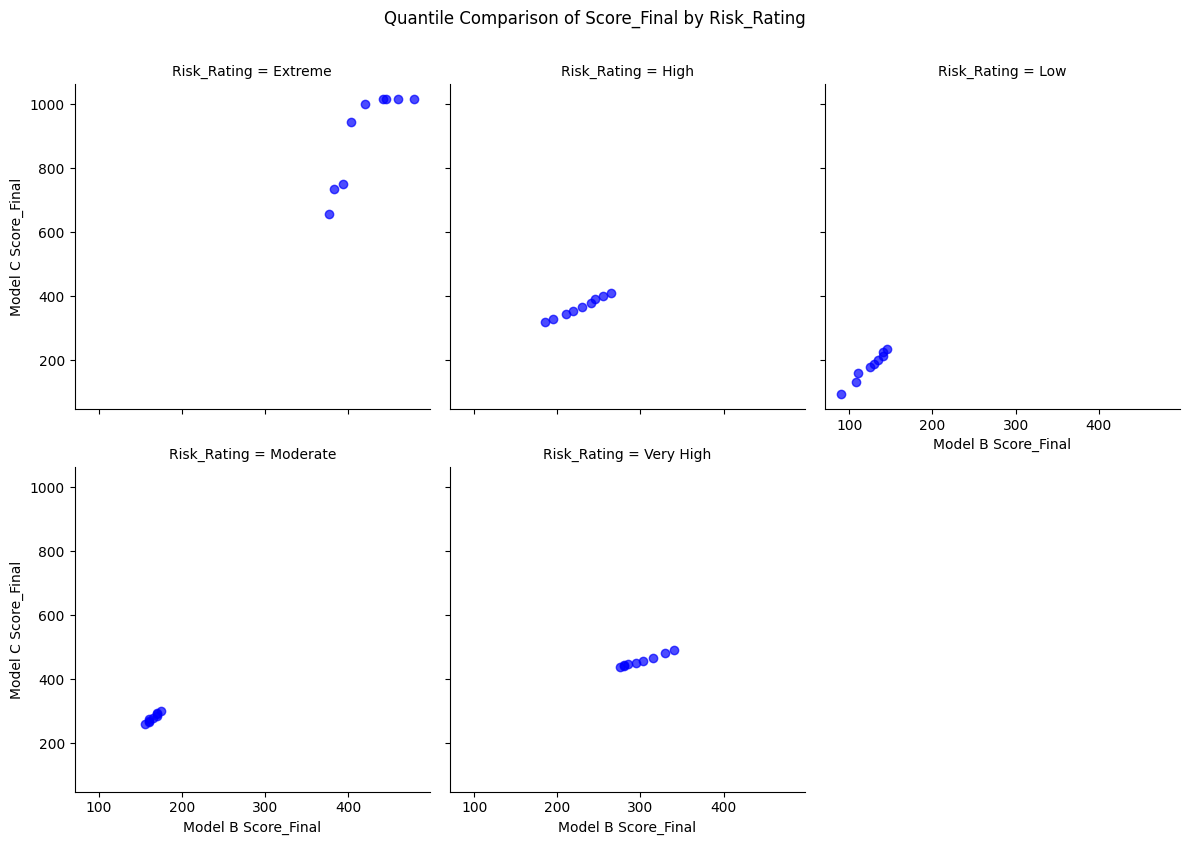

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the two models
df_B = gdf[gdf['Model'] == 'B']
df_C = gdf[gdf['Model'] == 'C']

# Define the quantiles you want to compute (here, deciles)
quantiles = np.linspace(0.1, 0.9, 9)

# Create a list to hold quantile data
quantile_data = []

# Loop over each risk rating present in the data
for rr in sorted(gdf['Risk_Rating'].unique()):
    # Select scores for the current risk rating for each model
    scores_B = df_B[df_B['Risk_Rating'] == rr]['Score_Final']
    scores_C = df_C[df_C['Risk_Rating'] == rr]['Score_Final']
    
    # Only proceed if there are enough observations in both models
    if len(scores_B) > 0 and len(scores_C) > 0:
        for q in quantiles:
            q_B = scores_B.quantile(q)
            q_C = scores_C.quantile(q)
            quantile_data.append({
                'Risk_Rating': rr,
                'Quantile': q,
                'Score_B': q_B,
                'Score_C': q_C
            })

# Create a DataFrame from the quantile data
df_quantiles = pd.DataFrame(quantile_data)

# Create faceted scatterplots: one subplot per risk rating
g = sns.FacetGrid(df_quantiles, col='Risk_Rating', col_wrap=3, height=4)
g.map(plt.scatter, 'Score_B', 'Score_C', color='blue', alpha=0.7)

# Set axis labels and a title
g.set_axis_labels('Model B Score_Final', 'Model C Score_Final')
g.fig.suptitle('Quantile Comparison of Score_Final by Risk_Rating', y=1.05)

plt.show()

Okay, now I'm going to refactor model B to Model C

In [62]:
wrwc_feat_cols = ['Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress']

for model in ['B', 'C']:
    print(f"Unique values for Model {model}:")
    subset = gdf[gdf['Model'] == model]
    for col in wrwc_feat_cols:
        unique_vals = subset[col].unique()
        print(f"  {col}: {unique_vals}")
    print("\n")

Unique values for Model B:
  Address_Visible: [ 5 15  0]
  Driveway_Clearance: [ 0  5 10]
  Driveway_Lenth: [nan]
  Dist_to_Danger_Topo: [ 0 30 75]
  Slope_Final: [ 0. 20. 40.]
  Background_Fuels: [25 50 75]
  Defensible_Space: [ 50   0  75 100]
  Roofing_Material: [  0 200]
  Building_Exterior: [ 0 60 20]
  Other_Combustibles: [ 0 30 10]
  Decks_and_Fencing: [20  0 50]
  Proximity_to_Neighboring_Home: [nan]
  Ingress_Egress: [ 0 10]


Unique values for Model C:
  Address_Visible: [ 5 15  0]
  Driveway_Clearance: [11  0  5 10]
  Driveway_Lenth: [11.  5.  0. 10.]
  Dist_to_Danger_Topo: [ 0 50 51 25]
  Slope_Final: [ 0. 10. 21. 22.]
  Background_Fuels: [40 20 10 41]
  Defensible_Space: [101  75 100  50   0]
  Roofing_Material: [301   0 300]
  Building_Exterior: [71  0 70 35]
  Other_Combustibles: [81 40  0 80]
  Decks_and_Fencing: [101 100   0]
  Proximity_to_Neighboring_Home: [  0.  50. 201. 100. 200.]
  Ingress_Egress: [10  0 11]




In [65]:
# Manually create a refactoring dictionary
mapping_rules = {
    'Address_Visible': {
        5: 5,
        15: 15
    },
    'Driveway_Clearance': {
        5: 5, 
        10: 10
    },
    'Dist_to_Danger_Topo': {
        30: 25,
        75: 50
    },
    'Slope_Final': {
        20: 10,
        40: 20
    },
    'Background_Fuels': {
        25: 10,
        50: 20,
        75: 40
    },
    'Roofing_Material': {
        200: 300
    },
    'Building_Exterior': {
        20: 35,
        60: 70
    },
    'Other_Combustibles': {
        10: 40,
        30: 80
    },
    'Decks_and_Fencing': {
        20: 0,
        50: 100
    }
}

In [66]:
rules_list = []
for col, rules in mapping_rules.items():
    for b_val, c_val in rules.items():
        rules_list.append({
            'Column': col,
            'B Value': b_val,
            'C Value': c_val
        })

conditions_df = pd.DataFrame(rules_list)
conditions_df

,Column,B Value,C Value
0,Address_Visible,5,5
1,Address_Visible,15,15
2,Driveway_Clearance,5,5
3,Driveway_Clearance,10,10
4,Dist_to_Danger_Topo,30,25
5,Dist_to_Danger_Topo,75,50
6,Slope_Final,20,10
7,Slope_Final,40,20
8,Background_Fuels,25,10
9,Background_Fuels,50,20


Notice that we ommitted columns that are present in Model C but absent in Model B. 'Driveway Length' and 'Proximity to Neighboring Home'. Driveway length where Model == B will just be set to 11, since that is the value for Unknown in Model C. 'Proximity' will be set to the distance that I've measured with GIS, classified to a score accordingly. We'll do these later. First, let's apply the mapping rules.

In [67]:
import pandas as pd

# Iterate over each rule
for _, rule in conditions_df.iterrows():
    col = rule['Column']
    b_val = rule['B Value']
    c_val = rule['C Value']
    
    # Handle missing values with .isna()
    if pd.isna(b_val):
        gdf.loc[(gdf['Model'] == 'B') & (gdf[col].isna()), col] = c_val
    else:
        gdf.loc[(gdf['Model'] == 'B') & (gdf[col] == b_val), col] = c_val


Now that the rules were applied, we're going to set all values of driveway length for model B to 11.

In [68]:
gdf.loc[gdf['Model'] == 'B', 'Driveway_Lenth'] = 11

Now we're going to make some rules for distance to nearest home using my GIS values.

In [70]:
# Meters to feet conversion factor
conv = 3.28084

# function containing and applying conditions for Model B
def assign_proximity_score(row):
    if row['Model'] == 'B':
        dist_ft = row['min_ssd'] * conv
        if dist_ft > 100:
            return 0
        elif 30 <= dist_ft <= 100:
            return 50
        elif 10 <= dist_ft < 30:
            return 100
        else:  # dist_ft < 10
            return 200
    else:
        # For non-B models, you might return the original value or something else
        return row['Proximity_to_Neighboring_Home']

gdf['Proximity_to_Neighboring_Home'] = gdf.apply(assign_proximity_score, axis=1)

In [92]:
print(gdf[gdf['Model'] == 'B']['Proximity_to_Neighboring_Home'].unique())
print(gdf[gdf['Model'] == 'B']['Driveway_Lenth'].unique())
print(gdf[gdf['Model'] == 'B']['Roofing_Material'].unique())

[  0. 100.  50. 200.]
[11.]
[  0 300]


In [71]:
gdf.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out',
       'Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)'

In [72]:
wrwc_feat_cols

['Address_Visible',
 'Driveway_Clearance',
 'Driveway_Lenth',
 'Dist_to_Danger_Topo',
 'Slope_Final',
 'Background_Fuels',
 'Defensible_Space',
 'Roofing_Material',
 'Building_Exterior',
 'Other_Combustibles',
 'Decks_and_Fencing',
 'Proximity_to_Neighboring_Home',
 'Ingress_Egress']

Finally, let's recalculate the final score with the total of all the feature columns.

In [74]:
gdf['Score_Final'] = gdf[wrwc_feat_cols].sum(axis=1)

Finally let's reclass 'Risk_Rating' according to the final scores. 

In [77]:
# Print the min and max Score_Final for Model B
min_score = gdf.loc[gdf['Model'] == 'B', 'Score_Final'].min()
max_score = gdf.loc[gdf['Model'] == 'B', 'Score_Final'].max()
print("Min Score_Final for Model B:", min_score)
print("Max Score_Final for Model B:", max_score)

Min Score_Final for Model B: 36.0
Max Score_Final for Model B: 721.0


In [80]:
gdf['Risk_Rating'].unique()

array(['High', 'Low', 'Extreme', 'Moderate', 'Very High'], dtype=object)

In [81]:
# Adjust Risk Rating classes for Model B
import numpy as np

def assign_risk(row):
    # Only update for Model B
    if row['Model'] == 'B':
        score = row['Score_Final']
        if 20 <= score <= 240:
            return 'Low'
        elif 241 <= score <= 305:
            return 'Moderate'
        elif 306 <= score <= 435:
            return 'High'
        elif 436 <= score <= 505:
            return 'Very High'
        elif 506 <= score <= 1000:
            return 'Extreme'
        else:
            # If score doesn't fall within any defined range, keep the original value
            return row['Risk_Rating']
    else:
        return row['Risk_Rating']

# Apply the function row-wise
gdf['Risk_Rating'] = gdf.apply(assign_risk, axis=1)

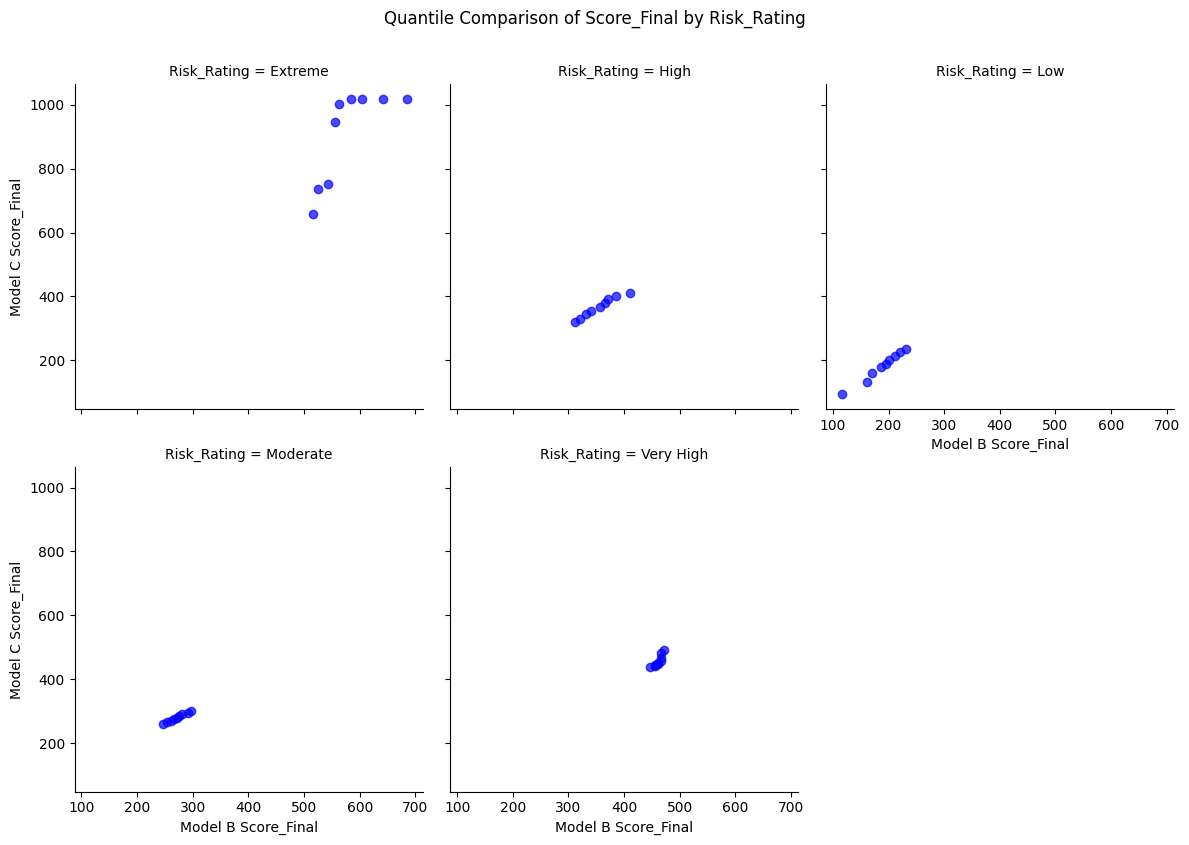

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the two models
df_B = gdf[gdf['Model'] == 'B']
df_C = gdf[gdf['Model'] == 'C']

# Define the quantiles you want to compute (here, deciles)
quantiles = np.linspace(0.1, 0.9, 9)

# Create a list to hold quantile data
quantile_data = []

# Loop over each risk rating present in the data
for rr in sorted(gdf['Risk_Rating'].unique()):
    # Select scores for the current risk rating for each model
    scores_B = df_B[df_B['Risk_Rating'] == rr]['Score_Final']
    scores_C = df_C[df_C['Risk_Rating'] == rr]['Score_Final']
    
    # Only proceed if there are enough observations in both models
    if len(scores_B) > 0 and len(scores_C) > 0:
        for q in quantiles:
            q_B = scores_B.quantile(q)
            q_C = scores_C.quantile(q)
            quantile_data.append({
                'Risk_Rating': rr,
                'Quantile': q,
                'Score_B': q_B,
                'Score_C': q_C
            })

# Create a DataFrame from the quantile data
df_quantiles = pd.DataFrame(quantile_data)

# Create faceted scatterplots: one subplot per risk rating
g = sns.FacetGrid(df_quantiles, col='Risk_Rating', col_wrap=3, height=4)
g.map(plt.scatter, 'Score_B', 'Score_C', color='blue', alpha=0.7)

# Set axis labels and a title
g.set_axis_labels('Model B Score_Final', 'Model C Score_Final')
g.fig.suptitle('Quantile Comparison of Score_Final by Risk_Rating', y=1.05)

plt.show()

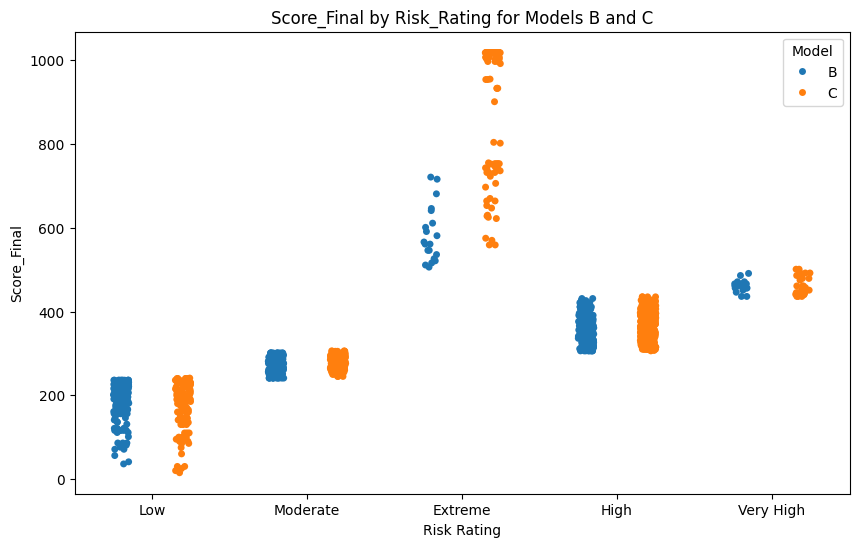

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only include Models B and C
filtered_gdf = gdf[gdf['Model'].isin(['B', 'C'])]

plt.figure(figsize=(10,6))
sns.stripplot(data=filtered_gdf, x='Risk_Rating', y='Score_Final', hue='Model', jitter=True, dodge=True)
plt.xlabel('Risk Rating')
plt.ylabel('Score_Final')
plt.title('Score_Final by Risk_Rating for Models B and C')
plt.legend(title='Model')
plt.show()

The above plot compares final score distributions between models B and C, after refactoring. We would expect to see approximately equal distributions between the two models in each risk class.

There are two notable things about the above plot. First is that the Extreme bin contains a much lower distribution of final scores for models refactored from Model B compared to Model C. I don't have an explanation for that. 

The second notable thing is that the bins are very uneven in size and I would be interested in knowing how these bin sizes were chosen. 
- 20 <= 'Low' <= 240 (range=220)
- 241 <= 'Moderate' <= 305 (range=64)
- 306 <= 'High' <= 435 (range=129)
- 436 <= 'Very High' <= 505 (range=69)
- 506 <= 'Extreme' <= 1000 (range=494)

In [133]:
# Save new gdf to file
gdf.to_file(os.path.join(out, 'feat_risk_refact.gpkg'), layer='full', driver='GPKG', index=False)

## Step 4: General Analysis of Data
---

In [93]:
# How many extreme risk ratings are there, per model?
models = ['B', 'C']
for model in models:
    print(f'Model {model}: ', len(gdf[(gdf['Model'] == model) & (gdf['Risk_Rating'] == 'Extreme')]))

Model B:  20
Model C:  95


In [94]:
gdf.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out',
       'Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)'

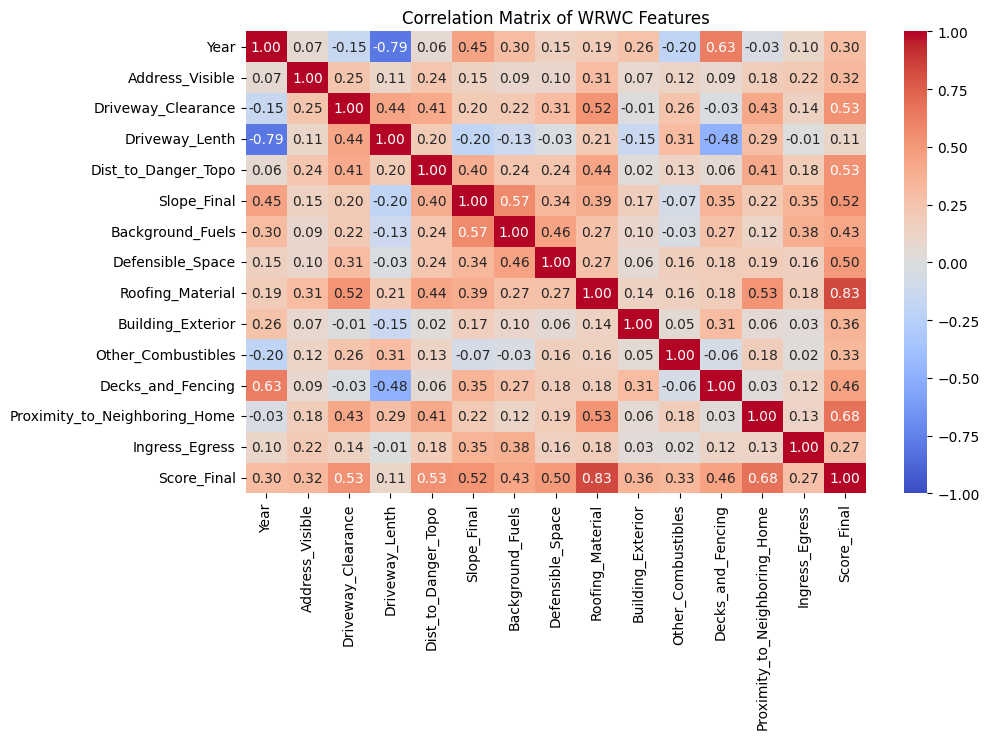

In [102]:
wrwc_cols = ['Year',
            'Address_Visible',
            'Driveway_Clearance',
            'Driveway_Lenth',
            'Dist_to_Danger_Topo',
            'Slope_Final',
            'Background_Fuels',
            'Defensible_Space',
            'Roofing_Material',
            'Building_Exterior',
            'Other_Combustibles',
            'Decks_and_Fencing',
            'Proximity_to_Neighboring_Home',
            'Ingress_Egress',
            'Score_Final']

corr_matrix = gdf[wrwc_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of WRWC Features")
plt.show()

In [104]:
gdf['Year'].unique()

array([2013., 2017., 2022., 2023.])

We can see a few correlations here. 
- The strongest negative correlation is between Year and Driveway_Lenth. That is because I gave driveway length the highest possible score for Model B assessments, where there was no observation for that feature. The highest possible score was 11, and was the value that 'Unknown - not observed' received in Model C. 
- Year also has a strong correlation with Decks_and_Fencing, suggesting that more flammable decks and fences were observed in more recent assessments.
- Year also has a strong correlation with slope, suggesting that higher slopes were observed in more recent assessments.
- Year also has a moderate correlation with Score_Final (0.30), suggesting that higher risk was observed in later years. 
- The most interesting finding is that Roofing_Material has a very strong correlation with Score_Final (0.83). I don't know how to comment on that yet. All features have a positive correlation with Score_Final because Score_Final is the sum of all the feature scores. So The fact that roof stands out as the most highly correlated with structure score could have to do with the fact that roof can take on values of 0, 300, or 301. So if the roof is flammable (or wasn't able to be observed), it moves the needle on the final score in a big way. Along these same lines, roofing material is positively correlated with driveway length (0.21) and driveway clearance (0.52), possibly suggesting that longer and more rugged driveways resulted in roofing material not being observed, and therefore receiving the highest score.

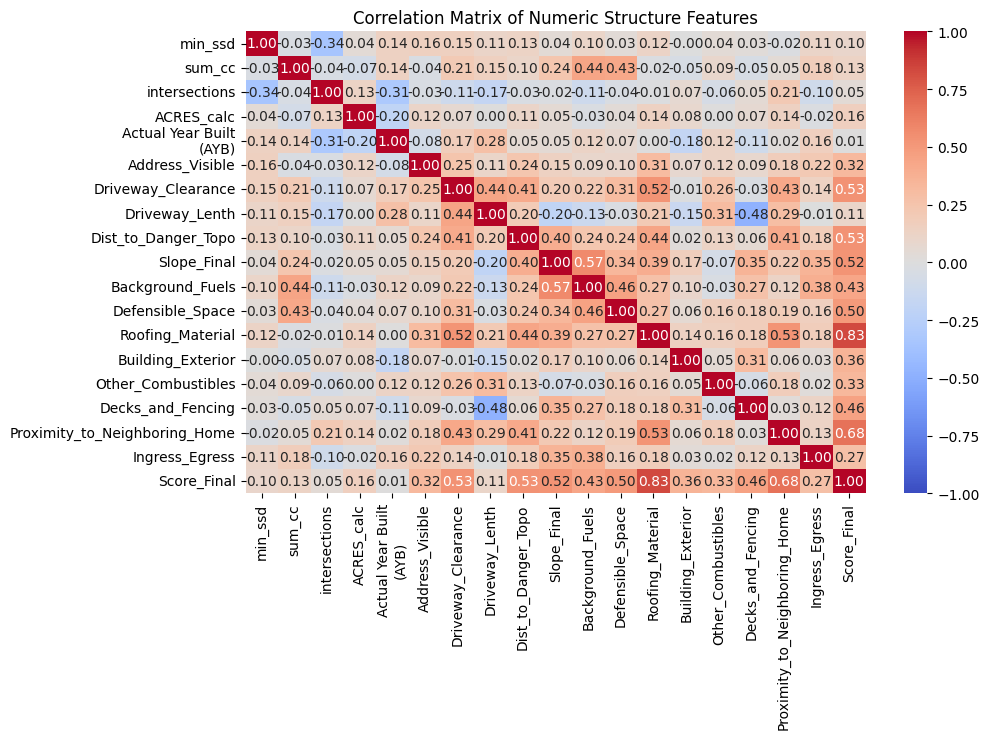

In [101]:
# Create 'sum_cc' column
gdf['sum_cc'] = gdf[['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']].sum(axis=1)
# Define num cols to compare to
num_cols = ['min_ssd', 
            'sum_cc',
            'intersections',
            'ACRES_calc',
            'Actual Year Built\n(AYB)',
            'Address_Visible',
            'Driveway_Clearance',
            'Driveway_Lenth',
            'Dist_to_Danger_Topo',
            'Slope_Final',
            'Background_Fuels',
            'Defensible_Space',
            'Roofing_Material',
            'Building_Exterior',
            'Other_Combustibles',
            'Decks_and_Fencing',
            'Proximity_to_Neighboring_Home',
            'Ingress_Egress',
            'Score_Final'
            ]

import seaborn as sns
import numpy as np

# Compute correlation matrix
corr_matrix = gdf[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Structure Features")
plt.show()


There are many interesting things in here that I would like to explore more. I'll talk about some of the most interesting ones here. 
- ACRES_calc actually has a moderately positive correlation to Score_Final (0.16), suggesting that homes on larger properties receive higher risk scores. This is interesting for a couple reasons. First, that homes on larger properties have control over their own defensible space, compared to homes on smaller properties. Second, we would expect structure separation distance and structure density to be lower on homes with larger  properties, suggesting that adjacent structures do not have as large of an influence in this specific risk score. This is supported by the near-zero correlation (0.05) that intersections has with the final score. 
- sum_cc has a strong correlation with wrwc's features 'Background_Fuels' (0.44) and 'Defensible_Space' (0.43).  
- Year built has a positive correlation with driveway length, suggesting that newer homes have longer driveways. This indicated that Ouray County is growing in a srpawl pattern, which Syphard et al. (year) find to be at the highest risk of structure loss, compared to growing in denser, smaller neighborhoods.
- The most interesting finding to me is that min_ssd (gathered from my GIS assessment) has almost 0 correlation with 'Proximity_to_Neighboring_Home'. Since 'proximity' is a score, where higher scores equal lower distance, we would expect a stronger negative correlation between these two features - one gathered by me and one gathered by WRWC.

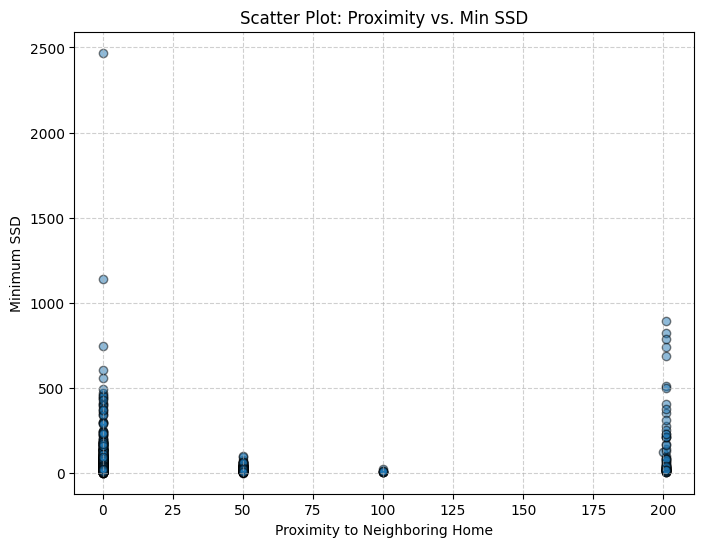

In [105]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Proximity_to_Neighboring_Home'], df['min_ssd'], alpha=0.5, edgecolor='k')

# Labels and title
plt.xlabel('Proximity to Neighboring Home')
plt.ylabel('Minimum SSD')
plt.title('Scatter Plot: Proximity vs. Min SSD')

# Show grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Very interesting. It's kind of hard to see, but if you look on the far right at 200, there seems to be 1 single point that is 200, and the rest appear to be just to the right, possibly at 201. Let's investigate that further. If it's true, then proximity to neighboring home increases the score when it is not observed, which could mean that the neighboring home can't be seen and is possibly quite far away, in which case it should receive a lower score, not a higher score. This explains why min_ssd has such as weak correlation with proximity to nearest home. Let's investigate further.

In [108]:
print(len(gdf[gdf['Proximity_to_Neighboring_Home'] == 200]))
print(len(gdf[gdf['Proximity_to_Neighboring_Home'] == 201]))

27
65


Yes, there are more than twice the number of observations where the proximity is unknown or unobserved than where the homes are actually close together. You assume that if homes are close together, they can be observed. So assigning this a high value is reducing the correlation between actual structure separation distance and risk score.

### Categorical features

In [110]:
gdf.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out',
       'Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)'

In [112]:
cat_cols = [
    'wui_class',
    'hiz_ext_out', 
    'Air Conditioning\n(AIRC)',
    'Architecture Style\n(ARCH)',
    'Condition\n(COND)',
    'Frame\n(FRME)', 
    'Heating Fuel\n(HTFL)',
    'Roof Cover\n(RCVR)', 
    'Roof Structure\n(RSTR)'
]

for col in cat_cols:
    print(f'number of classes in {col}: {gdf[col].nunique()}')

number of classes in wui_class: 4
number of classes in hiz_ext_out: 2
number of classes in Air Conditioning
(AIRC): 4
number of classes in Architecture Style
(ARCH): 34
number of classes in Condition
(COND): 6
number of classes in Frame
(FRME): 13
number of classes in Heating Fuel
(HTFL): 12
number of classes in Roof Cover
(RCVR): 19
number of classes in Roof Structure
(RSTR): 19


Cleaning up categorical data - air conditioning

In [113]:
gdf['Air Conditioning\n(AIRC)'].unique()

array(['0 - N/A', '1 - NONE', '2 - AC/HT DCTS', '4 - AC/OWN DCT'],
      dtype=object)

In [115]:
gdf['Air Conditioning\n(AIRC)'] = gdf['Air Conditioning\n(AIRC)'].replace('0 - N/A', '1 - NONE')
gdf['Air Conditioning\n(AIRC)'].unique()

array(['1 - NONE', '2 - AC/HT DCTS', '4 - AC/OWN DCT'], dtype=object)

Architecture style does not appear to have an influence on Score_Final

<Figure size 1200x600 with 0 Axes>

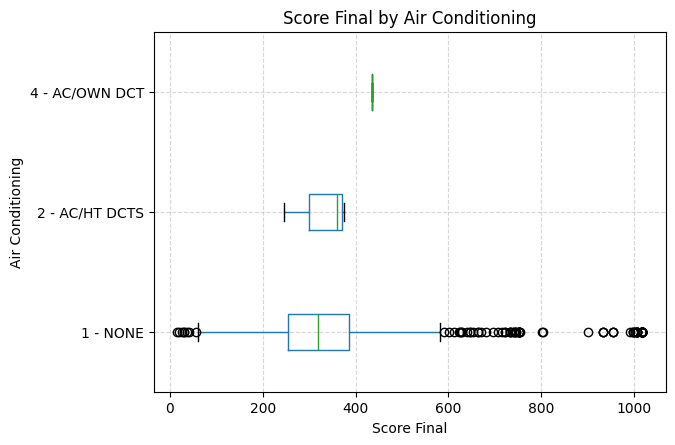

In [118]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='Air Conditioning\n(AIRC)', vert=False)

# Labels and title
plt.xlabel('Score Final')
plt.ylabel('Air Conditioning')
plt.title('Score Final by Air Conditioning')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Figure size 1200x600 with 0 Axes>

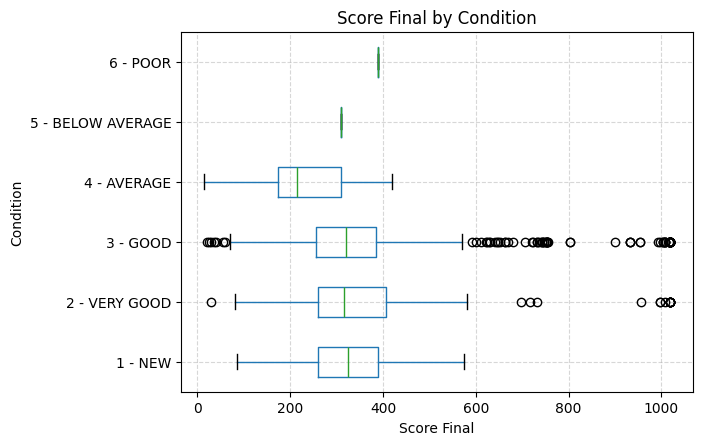

In [119]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='Condition\n(COND)', vert=False)

# Labels and title
plt.xlabel('Score Final')
plt.ylabel('Condition')
plt.title('Score Final by Condition')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [120]:
mean_scores = gdf.groupby('Condition\n(COND)')['Score_Final'].mean()
print(mean_scores)

Condition\n(COND)
1 - NEW              324.555556
2 - VERY GOOD        381.062992
3 - GOOD             345.033011
4 - AVERAGE          228.000000
5 - BELOW AVERAGE    310.000000
6 - POOR             390.000000
Name: Score_Final, dtype: float64


In [123]:
counts = gdf.groupby('Condition\n(COND)')['Score_Final'].count()
print(counts)


Condition\n(COND)
1 - NEW                18
2 - VERY GOOD         127
3 - GOOD             1242
4 - AVERAGE            11
5 - BELOW AVERAGE       1
6 - POOR                1
Name: Score_Final, dtype: int64


Okay, the means are kind of higher in worse-condition homes, but there is only one observation for lower condition classes, so that's not a large enough sample size to be indicative of anything.

In [124]:
counts = gdf.groupby('Roof Cover\n(RCVR)')['Score_Final'].count()
print(counts)

Roof Cover\n(RCVR)
1 - ASPHALT SH            1
1 - METAL                11
10 - GALVANIZED          21
11 - COMPOSITE           32
12 - CONCRETE TILE       58
13 - COPPER               2
14 - RUBBER               3
15 - SEAMED METAL        10
2 - ASPHT SHGL            4
2 - CEDAR SHAKE          14
3 - DISTRESSED METAL    142
3 - METAL                 1
4 - RIDGED RIB           10
5 - ASPH SHNGL          428
5 - GALV MTL              3
6 - WOOD SHINGLE         46
7 - CLAY TILE            19
8 - ADOBE SOD             3
9 - PRO PANEL           592
Name: Score_Final, dtype: int64


In [126]:
# Consolidate classes of roof type
metal = ['1 - METAL', '10 - GALVANIZED', '13 - COPPER', '15 - SEAMED METAL', '3 - DISTRESSED METAL',
         '3 - METAL', '4 - RIDGED RIB', '5 - GALV MTL', '9 - PRO PANEL']
asphalt = ['1 - ASPHALT SH', '2 - ASPHT SHGL', '5 - ASPH SHNGL']
tile = ['12 - CONCRETE TILE', '7 - CLAY TILE']
wood = ['2 - CEDAR SHAKE', '6 - WOOD SHINGLE']
other = ['11 - COMPOSITE', '14 - RUBBER', '8 - ADOBE SOD']

# Create a mapping dictionary
roof_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'METAL': metal,
    'ASPHALT': asphalt,
    'TILE': tile,
    'WOOD': wood,
    'OTHER': other
}.items():
    for value in values:
        roof_mapping[value] = category  # Map each value to its uppercase category

# Apply the mapping to gdf
gdf['Roof Cover\n(RCVR)'] = gdf['Roof Cover\n(RCVR)'].replace(roof_mapping)

counts = gdf.groupby('Roof Cover\n(RCVR)')['Score_Final'].count()
print(counts)


Roof Cover\n(RCVR)
ASPHALT    433
METAL      792
OTHER       38
TILE        77
WOOD        60
Name: Score_Final, dtype: int64


<Figure size 1200x600 with 0 Axes>

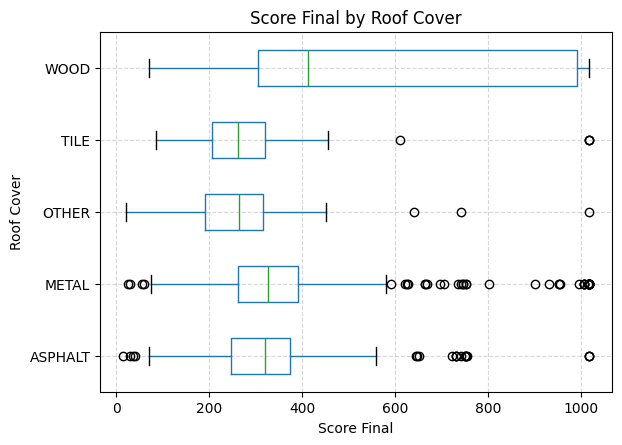

In [127]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='Roof Cover\n(RCVR)', vert=False)

# Labels and title
plt.xlabel('Score Final')
plt.ylabel('Roof Cover')
plt.title('Score Final by Roof Cover')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can see that wood roof types are highly correlated with the risk score. What about the roof score?

<Figure size 1200x600 with 0 Axes>

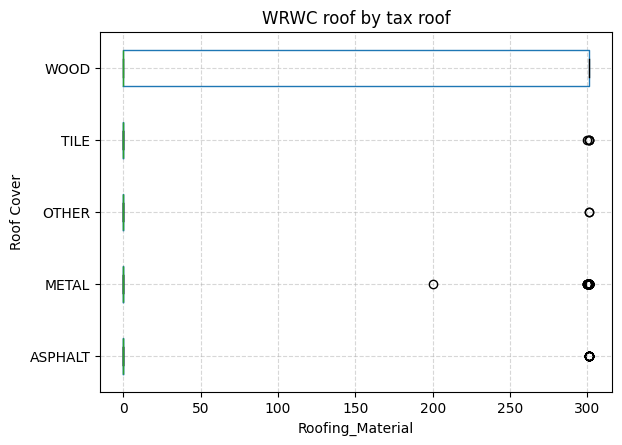

In [129]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Roofing_Material', by='Roof Cover\n(RCVR)', vert=False)

# Labels and title
plt.xlabel('Roofing_Material')
plt.ylabel('Roof Cover')
plt.title('WRWC roof by tax roof')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [148]:
# What are the total observations of each WRWC roof cover class by tax roof cover classes?
# Group by 'Roof Cover\n(RCVR)' and count occurrences of 'Roofing_Material' within each group
roof_comparison = gdf.groupby('Roof Cover\n(RCVR)')['Roofing_Material'].value_counts()

# Print the result
print(roof_comparison)


Roof Cover\n(RCVR)  Roofing_Material
ASPHALT             0                   420
                    301                  13
METAL               0                   739
                    301                  47
                    300                   5
                    200                   1
OTHER               0                    36
                    301                   2
TILE                0                    73
                    301                   3
                    300                   1
WOOD                0                    32
                    301                  19
                    300                   9
Name: count, dtype: int64


We can see that on average wood roofs are scored higher. However, there are cases in which wood roofs were scored low and others were scored high. Looks like, of all the WOOD roofs according to the tax assessor database, 28 of them were given scores of 300 or 301 whereas 32 of them (more) were given scores of 0. Interesting. It could be that this assessor database is outdated or it could be because of human error in the rapid assessments. Hard saying not knowing.

In [130]:
cat_cols

['wui_class',
 'hiz_ext_out',
 'Air Conditioning\n(AIRC)',
 'Architecture Style\n(ARCH)',
 'Condition\n(COND)',
 'Frame\n(FRME)',
 'Heating Fuel\n(HTFL)',
 'Roof Cover\n(RCVR)',
 'Roof Structure\n(RSTR)']

<Figure size 1200x600 with 0 Axes>

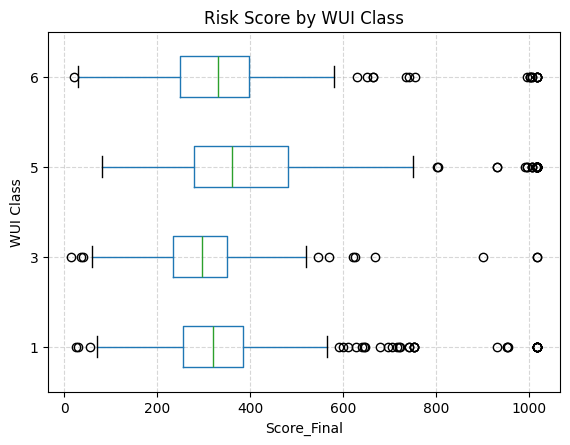

In [131]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='wui_class', vert=False)

# Labels and title
plt.xlabel('Score_Final')
plt.ylabel('WUI Class')
plt.title('Risk Score by WUI Class')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Figure size 1200x600 with 0 Axes>

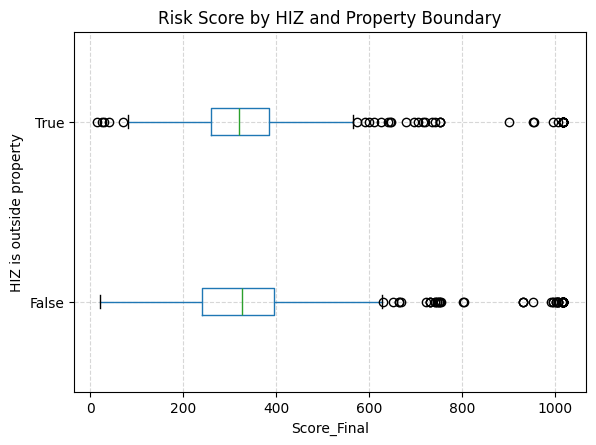

In [132]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='hiz_ext_out', vert=False)

# Labels and title
plt.xlabel('Score_Final')
plt.ylabel('HIZ is outside property')
plt.title('Risk Score by HIZ and Property Boundary')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [137]:
counts = gdf.groupby('Architecture Style\n(ARCH)')['Score_Final'].count()
print(counts)

Architecture Style\n(ARCH)
1 - COMM A                            1
1 - RANCH                           380
1 - SINGLE                            1
10 - 2-1/2 STY                        4
11 - A-FRAME                         11
12 - EARTH HOME                       4
13 - CUSTOM                         102
15 - NON-TRADITIONAL                  9
16 - GEO DOME                         3
17 - EARTH SHIP                       6
18 - 3 STORY                          2
19 - BI LEVEL                         5
2 - DOUBLE                            1
2 - TWO STY                         298
20 - APARTMENT                        9
21 - ONE STORY                       20
22 - TOWNHOUSE                        5
24 - RAISED RANCH                   118
25 - STRAW BALE                       6
26 - TIMBER FRAME CONST (PEGGED)      6
27 - SHACK                            1
28 - Apt Non Comm                     3
29 - MANUFACTURED                    76
3 - COMM C                            3
3 - SPLIT LVL

In [138]:
# Consolidate classes of architecture styles
commercial = ['1 - COMM A', '3 - COMM C', '4 - COMM D', '5 - COMM S']
single_story = ['1 - RANCH', '1 - SINGLE', '21 - ONE STORY', '24 - RAISED RANCH', '4 - VICTORIAN', '11 - A-FRAME']
multi_story = ['10 - 2-1/2 STY', '18 - 3 STORY', '19 - BI LEVEL', '2 - DOUBLE', '2 - TWO STY', '3 - SPLIT LVL', '9 - 1-1/2 STY']
manufactured = ['30 - PRE HUD MANUFACTURED', '29 - MANUFACTURED', '5 - MODULAR']
multi_family = ['20 - APARTMENT', '28 - Apt Non Comm', '22 - TOWNHOUSE']
alternative = ['25 - STRAW BALE', '17 - EARTH SHIP', '16 - GEO DOME', '12 - EARTH HOME', '27 - SHACK', '15 - NON-TRADITIONAL']
log = ['26 - TIMBER FRAME CONST (PEGGED)', '6 - CSTM LOG', '7 - MTN CABIN', '8 - LOG KIT']
custom = ['13 - CUSTOM']

# Create a mapping dictionary
arch_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'COMMERCIAL': commercial,
    'SINGLE STORY': single_story,
    'MULTI STORY': multi_story,
    'MANUFACTURED': manufactured,
    'MULTI FAMILY': multi_family,
    'ALTERNATIVE': alternative,
    'LOG': log,
    'CUSTOM': custom
}.items():
    for value in values:
        arch_mapping[value] = category  # Map each value to its uppercase category

# Apply the mapping to gdf
gdf['Architecture Style\n(ARCH)'] = gdf['Architecture Style\n(ARCH)'].replace(arch_mapping)

counts = gdf.groupby('Architecture Style\n(ARCH)')['Score_Final'].count()
print(counts)


Architecture Style\n(ARCH)
ALTERNATIVE      29
COMMERCIAL       18
CUSTOM          102
LOG             141
MANUFACTURED     95
MULTI FAMILY     17
MULTI STORY     467
SINGLE STORY    531
Name: Score_Final, dtype: int64


<Figure size 1200x600 with 0 Axes>

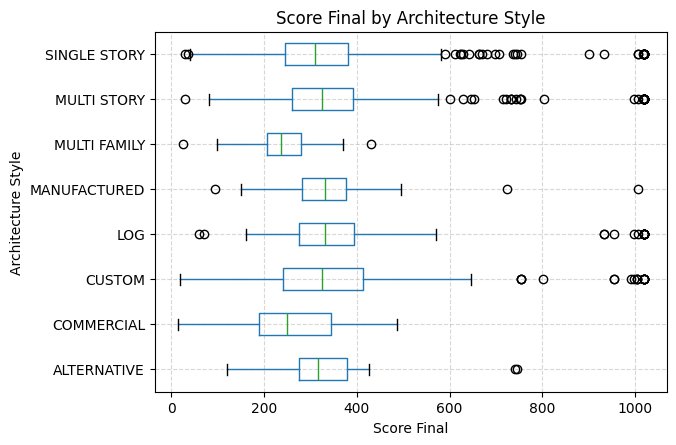

In [139]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='Architecture Style\n(ARCH)', vert=False)

# Labels and title
plt.xlabel('Score Final')
plt.ylabel('Architecture Style')
plt.title('Score Final by Architecture Style')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Architecture style does not appear to have a significant influence on Score_Final

In [141]:
counts = gdf.groupby('Roof Structure\n(RSTR)')['Score_Final'].count()
print(counts)

Roof Structure\n(RSTR)
0 - N/A             1
1 - FLAT           25
10 - GAMBREL       17
11 - HIP           45
12 - BOWSTRING      5
13 - DOME           1
14 - GEO DOME       2
2 - SHED LOW       21
3 - GABLE          15
3 - SHED MED      128
4 - ARCH            1
4 - HIP             1
4 - SHED STP       56
5 - GABEL LOW     157
6 - GABEL MED     655
7 - GABEL STP     157
7 - GAMBREL         3
8 - MULTI PEAK    105
9 - MANSARD         5
Name: Score_Final, dtype: int64


In [144]:
# Consolidate classes
mansard = ['9 - MANSARD', '10 - GAMBREL', '7 - GAMBREL']
other = ['0 - N/A', '1 - FLAT', '12 - BOWSTRING', '13 - DOME', '14 - GEO DOME', '4 - ARCH']
gable = ['3 - GABLE', '5 - GABEL LOW', '6 - GABEL MED', '7 - GABEL STP', '4 - HIP', '11 - HIP']
shed = ['2 - SHED LOW', '3 - SHED MED', '4 - SHED STP']
multi_peak = ['8 - MULTI PEAK']

# Create a mapping dictionary
roof_structure_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'MANSARD': mansard,
    'OTHER': other,
    'GABLE': gable,
    'SHED': shed,
    'MULTI_PEAK': multi_peak
}.items():
    for value in values:
        roof_structure_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Roof Structure\n(RSTR)'] = gdf['Roof Structure\n(RSTR)'].replace(roof_structure_mapping)

counts = gdf.groupby('Roof Structure\n(RSTR)')['Score_Final'].count()
print(counts)

Roof Structure\n(RSTR)
GABLE         1030
MANSARD         25
MULTI_PEAK     105
OTHER           35
SHED           205
Name: Score_Final, dtype: int64


<Figure size 1200x600 with 0 Axes>

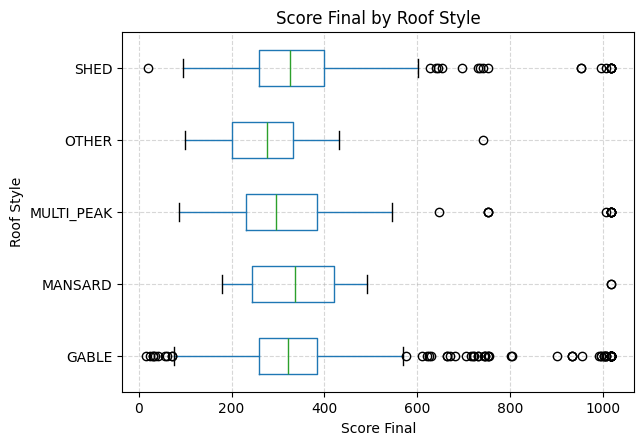

In [145]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
gdf.boxplot(column='Score_Final', by='Roof Structure\n(RSTR)', vert=False)

# Labels and title
plt.xlabel('Score Final')
plt.ylabel('Roof Style')
plt.title('Score Final by Roof Style')
plt.suptitle('')  # Remove default GroupBy title

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [146]:
# Save new gdf to file
gdf.to_file(os.path.join(out, 'feat_risk_refact.gpkg'), layer='full', driver='GPKG', index=False)

In [151]:
import geopandas as gpd

gdf = gpd.read_file(os.path.join(out, 'feat_risk_refact.gpkg'), layer='full')
gdf.head()

,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL),sum_cc,geometry
0,0,2836,430506210001,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225.0,High,Ouray County,1,31.525324,0.028983,0.080487,0.112609,0.179108,1,430506210001,R003918,49.6527,True,2008.0,1 - NONE,COMMERCIAL,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,METAL,GABLE,Commercial,0.0,0.401187,POINT (255148.616 4230223.23)
1,1,1110,430506210001,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135.0,Low,Ouray County,1,31.525324,0.051442,0.096132,0.093393,0.155315,1,430506210001,R003918,49.6527,False,2008.0,1 - NONE,COMMERCIAL,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,METAL,GABLE,Commercial,0.0,0.396283,POINT (255108.006 4230179.848)
2,2,3672,430506210001,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360.0,Extreme,Ouray County,1,66.164004,0.035089,0.059277,0.031211,0.026098,0,430506210001,R003918,49.6527,True,2008.0,1 - NONE,COMMERCIAL,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,METAL,GABLE,Commercial,0.0,0.151675,POINT (255042.316 4230227.366)
3,3,3843,430506210001,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415.0,Extreme,Ouray County,1,78.033957,0.054498,0.065344,0.076959,0.213781,0,430506210001,R003918,49.6527,False,2008.0,1 - NONE,COMMERCIAL,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,METAL,GABLE,Commercial,0.0,0.410582,POINT (255079.817 4230091.78)
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,11.0,0,0.0,10,50,0,0,0,0,0.0,0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.000000,0,403935100181,R000531,32.7283,False,2012.0,1 - NONE,SINGLE STORY,0.0,4034.9,3 - GOOD,0.0,2015.0,100.0,26 - CONCRETE SIDING,1 - WDJST PLYW,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,572.0,215.0,0.776148,ASPHALT,GABLE,Residence,0.0,0.167940,POINT (252995.437 4241729.295)


In [152]:
cat_cols = [
    'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)',
       'Interior Wall\n(INT)'
]

for col in cat_cols:
    print(f'number of classes in {col}: {gdf[col].nunique()}')

number of classes in Exterior Wall
(EXW): 37
number of classes in Floor
(FLR): 20
number of classes in Frame
(FRME): 13
number of classes in Heating Fuel
(HTFL): 12
number of classes in Interior Wall
(INT): 13


In [153]:
for col in cat_cols:
    counts = gdf.groupby(col)['Score_Final'].count()
    print(counts)

Exterior Wall\n(EXW)
0 - N/A                       1
1 - CEDAR                     1
1 - MASONARY                 16
10 - FORM. CONC               2
10 - WD SHINGLE               4
11 - ASBESTOS                 9
12 - ASPHALT                  5
13 - VINYL                   33
14 - T-111                   75
15 - PLYWOOD                 14
15 - STONE                    4
16 - REAL LOG               113
17 - BD/BATTEN               67
18 - MOSS ROCK                1
19 - BRK/VENEER               3
19 - METAL                    1
2 - WOOD                    437
20 - BRICK                    5
21 - MILLED LOG              74
22 - ALUM                    12
23 - REDWOOD                  2
24 - CEDAR                   45
25 - T&G PINE                18
26 - CONCRETE SIDING         39
27 - FIBER-CEMENT SIDING      1
3 - DESTRESSED METAL         38
3 - PLYWOOD                   1
4 - FRAME                     1
5 - STUCCO (F)              209
6 - MILLED LOG                1
6 - STUCCO (M)     

In [164]:
wood = ['1 - CEDAR', '10 - WD SHINGLE', '15 - PLYWOOD', '16 - REAL LOG', '2 - WOOD', '21 - MILLED LOG', 
        '23 - REDWOOD', '24 - CEDAR', '25 - T&G PINE', '3 - PLYWOOD', '4 - FRAME', '6 - MILLED LOG', 
        '8 - MISC. WOOD', '0 - N/A']
stone = ['1 - MASONARY', '10 - FORM. CONC', '15 - STONE', '18 - MOSS ROCK', '19 - BRK/VENEER', '20 - BRICK',
         '26 - CONCRETE SIDING', '5 - STUCCO (F)', '6 - STUCCO (M)', '7 - ROCK', '8 - ADOBE', '9 - CONC. BLK']
manfctd = ['11 - ASBESTOS', '12 - ASPHALT', '13 - VINYL', '14 - T-111', '17 - BD/BATTEN', 
           '27 - FIBER-CEMENT SIDING', '7 - BATT/BOARD', '9 - MASONITE']
metal = ['19 - METAL', '22 - ALUM', '3 - DESTRESSED METAL']

siding_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'WOOD': wood,
    'CONC/MSNRY': stone,
    'MANFCTD': manfctd,
    'METAL': metal
}.items():
    for value in values:
        siding_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Exterior Wall\n(EXW)'] = gdf['Exterior Wall\n(EXW)'].replace(siding_mapping)

counts = gdf.groupby('Exterior Wall\n(EXW)')['Score_Final'].count()
print(counts)

Exterior Wall\n(EXW)
CONC/MSNRY    339
MANFCTD       295
METAL          51
WOOD          715
Name: Score_Final, dtype: int64


In [162]:
wdjst = ['1 - CARPET', '1 - WDJST PLYW', '2 - WDJST SFWD', '11 - HARDWOOD', '3 - WDJST HDWD', '4 - PLYWOOD',
         '5 - WOOD PLANK', '6 - HARDWOOD', '9 - CSTM TILE', '12 - BAMBOO', '10 - CUST TILE']
stone = ['0 - N/A', '10 - CUSTOM CONCRETE', '11 - CONCRETE', '3 - ASPH TILE', '4 - CONC/TILE', 
         '5 - CONCRETE', '6 - TERRAZZO', '7 - BRICK PVR', '8 - FLAGSTONE']

floor_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'WDJST': wdjst,
    'CONC/MSNRY': stone
}.items():
    for value in values:
        floor_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Floor\n(FLR)'] = gdf['Floor\n(FLR)'].replace(floor_mapping)

counts = gdf.groupby('Floor\n(FLR)')['Score_Final'].count()
print(counts)

Floor\n(FLR)
CONC/MSNRY     109
WDJST         1291
Name: Score_Final, dtype: int64


In [159]:
wood = ['10 - FRME 2X6', '13 - LOG', '2 - FRME 2X4', '2 - WOOD', '9 - FRME 2X4']
other = ['8 - ADOBE', '7 - ROCK', '6 - BLOCK', '5 - MASONARY', '4 - REIN CONC', '3 - STEEL', '12 - BRICK', '0 - N/A']

frame_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'WOOD': wood,
    'OTHER': other
}.items():
    for value in values:
        frame_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Frame\n(FRME)'] = gdf['Frame\n(FRME)'].replace(frame_mapping)

counts = gdf.groupby('Frame\n(FRME)')['Score_Final'].count()
print(counts)

Frame\n(FRME)
OTHER     173
WOOD     1227
Name: Score_Final, dtype: int64


In [158]:
drywall = ['1 - DRYWALL', '1 - SUPERIOR', '2 - AVERAGE', '4 - INFERIOR', '5 - GOOD']
wood = ['4 - T&G PINE', '5 - T&G CEDAR', '6 - T&G ASPEN', '7 - LOG']
other = ['0 - N/A', '2 - PLSTR/LTH', '3 - PANELING', '8 - ADOBE']

interior_wall_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'DRYWALL': drywall,
    'WOOD': wood,
    'OTHER': other
}.items():
    for value in values:
        interior_wall_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Interior Wall\n(INT)'] = gdf['Interior Wall\n(INT)'].replace(interior_wall_mapping)

counts = gdf.groupby('Interior Wall\n(INT)')['Score_Final'].count()
print(counts)


Interior Wall\n(INT)
DRYWALL    1111
OTHER       164
WOOD        125
Name: Score_Final, dtype: int64


In [155]:
stove = ['2 - WOOD', '0 - N/A', '1 - NONE', '6 - COAL', '8 - PELLET STV', '9 - OIL']
gas = ['10 - NATURAL GAS', '3 - GAS']
propane = ['7 - PROPANE']
electric = ['4 - ELECTRIC', '5 - SOLAR', '55 - TEST HTFL']

# Create a mapping dictionary
heating_fuel_mapping = {}

# Assign each category name to its corresponding values
for category, values in {
    'STOVE': stove,
    'GAS': gas,
    'PROPANE': propane,
    'ELECTRIC': electric
}.items():
    for value in values:
        heating_fuel_mapping[value] = category  # Map each value to its category

# Apply the mapping to gdf
gdf['Heating Fuel\n(HTFL)'] = gdf['Heating Fuel\n(HTFL)'].replace(heating_fuel_mapping)

counts = gdf.groupby('Heating Fuel\n(HTFL)')['Score_Final'].count()
print(counts)

Heating Fuel\n(HTFL)
ELECTRIC    229
GAS         216
OTHER        10
PROPANE     834
STOVE       111
Name: Score_Final, dtype: int64


In [157]:
gdf['Heating Fuel\n(HTFL)'] = gdf['Heating Fuel\n(HTFL)'].replace({'OTHER': 'STOVE'})
counts = gdf.groupby('Heating Fuel\n(HTFL)')['Score_Final'].count()
print(counts)

Heating Fuel\n(HTFL)
ELECTRIC    229
GAS         216
PROPANE     834
STOVE       121
Name: Score_Final, dtype: int64


In [165]:
# Save updated gdf to file
gdf.to_file(os.path.join(out, 'feat_risk_refact.gpkg'), layer='full', driver='GPKG', index=False)